In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
pd.options.display.max_rows = 100

## Data structuring

#### Importing data.csv

In [2]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E4_100def.csv".format(root_dir))
data_clean

,subject_id,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,...,responses,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,instruction,causal-graph1,1723,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,instruction,causal-graph1,4389,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,instruction,causal-graph1,12017,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,instruction,causal-graph1,12735,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,instruction,causal-graph1,19377,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,instruction,causal-graph1,20035,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,instruction,survey-multi-choice,25583,male,26.0,french,Australia,Left,R562805197500gxrw,...,"{""Q0"":"" To decide what caused the activation o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,instruction,causal-graph1,26192,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,UAAS_LB,causal-graph1,54923,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeB1
9,1,UAS_LT,causal-graph1,64980,male,26.0,french,Australia,Left,R562805197500gxrw,...,NaN,AND_Gate,Unrolled,Top,Squares,State,A,NaN,B,nodeA2


In [3]:
time = []
for item in data_clean[data_clean['stimulus']=='comment']['time_elapsed']:
    time.append(item)
time = np.array(time)
time.mean()/1000/60

2.64525

In [4]:
for idx,item in enumerate(data_clean['stimulus']):
    if item == 'comment':
        print(data_clean['responses'][idx])

{"Q0":"coucou"}
{"Q0":"coucou2"}


#### Demographical data only

In [5]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog = data_demog.drop_duplicates()
data_demog

,subject_id,gender,age,language,country,turkcode
0,1,male,26.0,french,Australia,R562805197500gxrw
17,2,NaN,NaN,NaN,Australia,R564495347230gxrw


In [6]:
data_demog['language'].value_counts()

french    1
Name: language, dtype: int64

#### Target stimuli only (instructions deleted)

In [7]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","rolled_OR_unrolled",
                   "A_branch_loc","A_detectors","state_OR_event","state_branch","root_1st","imdt_2nd","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,11055.135,UAAS_LB,Left,2.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeB1
1,1,8876.535,UAS_LT,Left,1.0,AND_Gate,Unrolled,Top,Squares,State,A,NaN,B,nodeA2
2,1,12606.575,UABS_LB,Left,1.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,A,B,nodeA3
3,1,8387.105,chainS_L,Left,1.0,ChainS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nodeB4
4,1,9798.380,UBS_LB,Left,1.0,AND_Gate,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA5
5,1,16435.010,UBAS_LB,Left,1.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeB6
6,1,9166.535,UBBS_LT,Left,1.0,AND_Gate,Unrolled,Top,Squares,Event,NaN,B,B,nodeA6
7,1,4219.465,comment,Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,23013.740,UABS_LT,Left,1.0,AND_Gate,Unrolled,Top,Squares,Event,NaN,A,B,nodeB1
9,2,12679.985,UBBS_LB,Left,1.0,AND_Gate,Unrolled,Bottom,Squares,Event,NaN,B,B,nodeA2


#### Chain only

In [8]:
data_chain = data[(data["stim_type"]=="ChainS")|(data["stim_type"]=="ChainC")].drop(["rolled_OR_unrolled","A_detectors",
                                                    "state_OR_event","state_branch","root_1st","imdt_2nd",],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["stim_type"] = data_chain["stim_type"].astype("category")
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,A_branch_loc,node_selected
0,1,8387.105,chainS_L,Left,1.0,ChainS,NaN,nodeB4
1,2,9884.190,chainS_L,Left,1.0,ChainS,NaN,nodeB7


#### AND-Gate only

In [9]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["rolled_OR_unrolled"] = data_AND_Gate["rolled_OR_unrolled"].astype("category")
data_AND_Gate["A_branch_loc"] = data_AND_Gate["A_branch_loc"].astype("category")
data_AND_Gate["A_detectors"] = data_AND_Gate["A_detectors"].astype("category")
data_AND_Gate["root_1st"] = data_AND_Gate["root_1st"].astype("category")
data_AND_Gate["imdt_2nd"] = data_AND_Gate["imdt_2nd"].astype("category")
data_AND_Gate

,subject_id,rt,stimulus,sampling,nb_of_run,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected
0,1,11055.135,UAAS_LB,Left,2.0,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeB1
1,1,8876.535,UAS_LT,Left,1.0,Unrolled,Top,Squares,State,A,NaN,B,nodeA2
2,1,12606.575,UABS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,A,B,nodeA3
3,1,9798.380,UBS_LB,Left,1.0,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA5
4,1,16435.010,UBAS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeB6
5,1,9166.535,UBBS_LT,Left,1.0,Unrolled,Top,Squares,Event,NaN,B,B,nodeA6
6,2,23013.740,UABS_LT,Left,1.0,Unrolled,Top,Squares,Event,NaN,A,B,nodeB1
7,2,12679.985,UBBS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,B,B,nodeA2
8,2,14733.090,UBAS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeB3
9,2,30110.645,UAS_LT,Left,1.0,Unrolled,Top,Squares,State,A,NaN,B,nodeA4


In [10]:
data_AND_Gate['A_detectors'][(data_AND_Gate['rolled_OR_unrolled']=='Unrolled')&(data_AND_Gate['subject_id']==1)].value_counts()

Squares    6
Name: A_detectors, dtype: int64

## Functions

In [11]:
def nb(letter,lower_bound,upper_bound):
    return [letter+str(i) for i in range(lower_bound,upper_bound+1)]

def chain_node_cat(stim,node):
    stim = stim.split('_')[0]
    node = node[4:]
    if stim == 'chainS':
        categories = {'INACT':nb('B',1,7),'ROOT':['B8','B9','B10'],'INBTW':nb('B',11,18),'IMDT':['B19'],'EFFECT':['B20']}
    elif stim == 'chainC':
        categories = {'INACT':nb('A',1,24),'ROOT':['A25','A26','A27'],'INBTW':nb('A',28,40),'IMDT':['A41'],'EFFECT':['B20']}
        
    category = [cat for cat,nd in categories.items() if node in nd][0]
    
    return category

def branch_node_cat(stim,node):
    node = node[4:]
    stim = stim.split('_')[0]
    if stim == 'RAAC':
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,4),'INACT_2nd':nb('B',1,5),'ROOT_1st':['A5','A6','A7'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',8,19),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RAC':
        categories = {'UNKNOWN':nb('A',1,19),'INACT_1st':[],'INACT_2nd':nb('B',1,5),'ROOT_1st':[],'ROOT_2nd':['B6','B7','B8'],
                      'INBTW_1st':[],'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RBAC': 
        categories = {'UNKNOWN':[],'INACT_1st':[],'INACT_2nd':nb('A',1,16),'ROOT_1st':['B1','B2','B3'],
                      'ROOT_2nd':['A17','A18','A19'],'INBTW_1st':nb('B',4,18),'INBTW_2nd':[],'IMDT_1st':['B19'],
                      'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'RBC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,5),'INACT_2nd':nb('A',1,2),'ROOT_1st':['B6','B7','B8'],
                      'ROOT_2nd':['A3','A4','A5'],'INBTW_1st':nb('B',9,18),'INBTW_2nd':nb('A',6,19),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A20'],'EFFECT':['B20']}
    elif stim == 'UAAC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UAAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,6),'INACT_2nd':nb('B',1,6),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UABS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,5),'INACT_2nd':nb('B',1,5),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['A41'],
                      'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('A',1,5),'INACT_2nd':nb('B',1,5),'ROOT_1st':['A6','A7','A8'],
                      'ROOT_2nd':['B6','B7','B8'],'INBTW_1st':nb('A',9,40),'INBTW_2nd':nb('B',9,18),'IMDT_1st':['A41'],
                      'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UBAC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBAS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBBS': 
        categories = {'UNKNOWN':[],'INACT_1st':[],'INACT_2nd':nb('A',1,35),'ROOT_1st':['B1','B2','B3'],
                      'ROOT_2nd':['A36','A37','A38'],'INBTW_1st':nb('B',4,18),'INBTW_2nd':nb('A',39,40),'IMDT_1st':['A41'],
                      'IMDT_2nd':['B19'],'EFFECT':['B20']}
    elif stim == 'UBC': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}
    elif stim == 'UBS': 
        categories = {'UNKNOWN':[],'INACT_1st':nb('B',1,2),'INACT_2nd':nb('A',1,18),'ROOT_1st':['B3','B4','B5'],
                      'ROOT_2nd':['A19','A20','A21'],'INBTW_1st':nb('B',6,18),'INBTW_2nd':nb('A',22,40),'IMDT_1st':['B19'],
                      'IMDT_2nd':['A41'],'EFFECT':['B20']}

    category = [cat for cat,nd in categories.items() if node in nd][0]

    return category

class AndGate(object):

    def __init__(self,rolled=False,continuity='root_1st'):
        if rolled == False:
            data = data_AND_Gate[data_AND_Gate["rolled_OR_unrolled"]=="Unrolled"]
        elif rolled == True:
            data = data_AND_Gate[data_AND_Gate["rolled_OR_unrolled"]=="Rolled"]
        if continuity == 'root_1st':
            data = data[data['root_1st']==data['imdt_2nd']]
        elif continuity == 'root_2nd':
            data = data[(data['root_1st']!=data['imdt_2nd'])|(data['state_OR_event']=='State')]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["nodeA"+str(i+1) for i in range(41)]+["nodeB"+str(i+1) for i in range(20)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['UNKNOWN','INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None,state=None,root_1st=None,state_branch=None,A_detectors=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["A_branch_loc"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["A_branch_loc"]=="Bottom"]
        if A_detectors == "squares":
            self.df = self.df[self.df["A_detectors"]=="Squares"]
        elif A_detectors == "circles":
            self.df = self.df[self.df["A_detectors"]=="Circles"]
        if state == False:
            self.df = self.df[self.df["state_OR_event"]=="Event"]
        elif state == True:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        if root_1st == 'A':
            self.df = self.df[self.df["root_1st"]=="A"]
        elif root_1st == 'B':
            self.df = self.df[self.df["root_1st"]=="B"]
        if state_branch == 'A':
            self.df = self.df[self.df["state_branch"]=="A"]
        if state_branch == 'B':
            self.df = self.df[self.df["state_branch"]=="B"]
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["nodeA"+str(i+1) for i in range(41)]+["nodeB"+str(i+1) for i in range(20)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['UNKNOWN','INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
class Chain(object):
    def __init__(self,stim=None):
        data = data_chain[data_chain["stim_type"] == stim]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        if stim == 'ChainS':
            nodes = ["nodeB"+str(i+1) for i in range(20)]
        elif stim == 'ChainC':
            nodes = ["nodeA"+str(i+1) for i in range(41)]+['nodesB20']
            
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == 'top':
            self.df = self.df[self.df['A_branch_loc']=='Top']
        elif level == 'bottom':
            self.df = self.df[self.df['A_branch_loc']=='Bottom']
            
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        stim = self.df['stim_type'].cat.remove_unused_categories().cat.categories[0]
        if stim == 'ChainS':
            nodes = ["nodeB"+str(i+1) for i in range(20)]
        elif stim == 'ChainC':
            nodes = ["nodeA"+str(i+1) for i in range(41)]+['nodesB20']
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
def graph(list_of_data,title,x_axis='node_category'):
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,110])
        axis.set_ylabel("Percentage of responses")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        if x_axis == 'node_selected':
            axis.set_xlabel("Detectors",labelpad=20)
            x.node_select.plot.bar(ax=axis)  
        elif x_axis == 'node_category':
            axis.set_xlabel("Location of the cause",labelpad=20)
            x.node_category.plot.bar(ax=axis)
            
def graph2(list_of_data,x_axis='node_category'):
    plt.rcParams['axes.grid'] = False
    fig = plt.figure(figsize=(9,4))
    #fig.suptitle("Experiment 1", fontweight="bold",y=1.05)
    a = str(len(list_of_data))
    titles = ['Unrolled squares','Unrolled circles','Rolled']
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_ylim([0,80])
        axis.set_ylabel("Number of responses (%)")
        axis.set_title(titles[i])
        axis.label_outer()
        categories = ['R1','I1','R2','I2','other']
        event_R1c = [x[0].node_category.ROOT_1st,x[0].node_category.IMDT_1st,x[0].node_category.ROOT_2nd,
                     x[0].node_category.IMDT_2nd,x[0].node_category.UNKNOWN+x[0].node_category.INACT_1st+
                     x[0].node_category.INACT_2nd+x[0].node_category.INBTW_1st+x[0].node_category.INBTW_2nd+
                     x[0].node_category.EFFECT]
        event_R2c = [x[1].node_category.ROOT_1st,x[1].node_category.IMDT_1st,x[1].node_category.ROOT_2nd,
                     x[1].node_category.IMDT_2nd,x[1].node_category.UNKNOWN+x[1].node_category.INACT_1st+
                     x[1].node_category.INACT_2nd+x[1].node_category.INBTW_1st+x[1].node_category.INBTW_2nd+
                     x[1].node_category.EFFECT]
        state_R2c = [x[2].node_category.ROOT_1st,x[2].node_category.IMDT_1st,x[2].node_category.ROOT_2nd,
                     x[2].node_category.IMDT_2nd,x[2].node_category.UNKNOWN+x[2].node_category.INACT_1st+
                     x[2].node_category.INACT_2nd+x[2].node_category.INBTW_1st+x[2].node_category.INBTW_2nd+
                     x[2].node_category.EFFECT]
        if i != 2:
            state_R1c = np.zeros(5)
        else:
            state_R1c = [x[3].node_category.ROOT_1st,x[3].node_category.IMDT_1st,x[3].node_category.ROOT_2nd,
                         x[3].node_category.IMDT_2nd,x[3].node_category.UNKNOWN+x[3].node_category.INACT_1st+
                         x[3].node_category.INACT_2nd+x[2].node_category.INBTW_1st+x[3].node_category.INBTW_2nd+
                         x[3].node_category.EFFECT]
        
        df = pd.DataFrame({'state (R1 cont)':state_R1c,'state (R2 cont)':state_R2c,'event (R1 cont)':event_R1c,
                           'event (R2 cont)':event_R2c,}, index=categories)
        if i != 1:
            legend = False
        else:
            legend = True
        df.plot.bar(ax=axis,legend=legend,rot=0)

In [12]:
data_chain['node_category'] = data_chain.apply(lambda x: chain_node_cat(x['stimulus'],x['node_selected']),axis=1)
data_chain['node_category'] = data_chain['node_category'].astype('category')
data_AND_Gate['node_category'] = data_AND_Gate.apply(lambda x: branch_node_cat(x['stimulus'],x['node_selected']),axis=1)
data_AND_Gate['node_category'] = data_AND_Gate['node_category'].astype('category')

In [13]:
data_chain

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,A_branch_loc,node_selected,node_category
0,1,8387.105,chainS_L,Left,1.0,ChainS,NaN,nodeB4,INACT
1,2,9884.190,chainS_L,Left,1.0,ChainS,NaN,nodeB7,INACT


In [14]:
data_AND_Gate

,subject_id,rt,stimulus,sampling,nb_of_run,rolled_OR_unrolled,A_branch_loc,A_detectors,state_OR_event,state_branch,root_1st,imdt_2nd,node_selected,node_category
0,1,11055.135,UAAS_LB,Left,2.0,Unrolled,Bottom,Squares,Event,NaN,A,A,nodeB1,INACT_2nd
1,1,8876.535,UAS_LT,Left,1.0,Unrolled,Top,Squares,State,A,NaN,B,nodeA2,INACT_1st
2,1,12606.575,UABS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,A,B,nodeA3,INACT_1st
3,1,9798.380,UBS_LB,Left,1.0,Unrolled,Bottom,Squares,State,B,NaN,A,nodeA5,INACT_2nd
4,1,16435.010,UBAS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeB6,INBTW_1st
5,1,9166.535,UBBS_LT,Left,1.0,Unrolled,Top,Squares,Event,NaN,B,B,nodeA6,INACT_2nd
6,2,23013.740,UABS_LT,Left,1.0,Unrolled,Top,Squares,Event,NaN,A,B,nodeB1,INACT_2nd
7,2,12679.985,UBBS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,B,B,nodeA2,INACT_2nd
8,2,14733.090,UBAS_LB,Left,1.0,Unrolled,Bottom,Squares,Event,NaN,B,A,nodeB3,ROOT_1st
9,2,30110.645,UAS_LT,Left,1.0,Unrolled,Top,Squares,State,A,NaN,B,nodeA4,INACT_1st


## General comparison

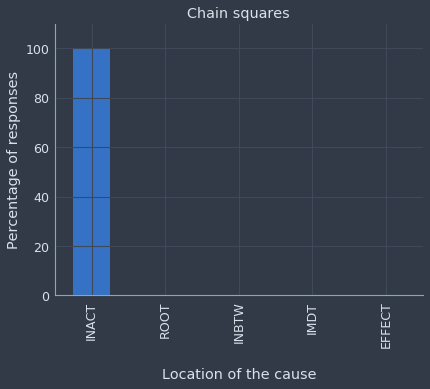

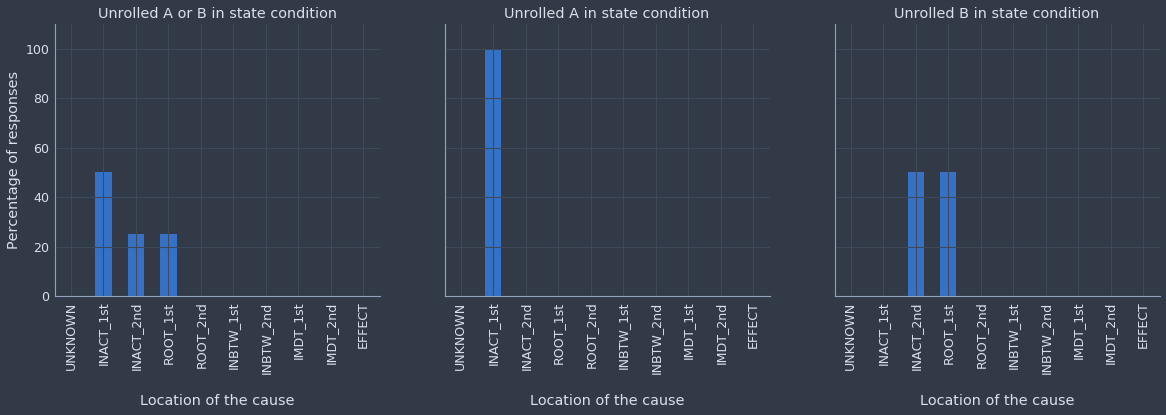

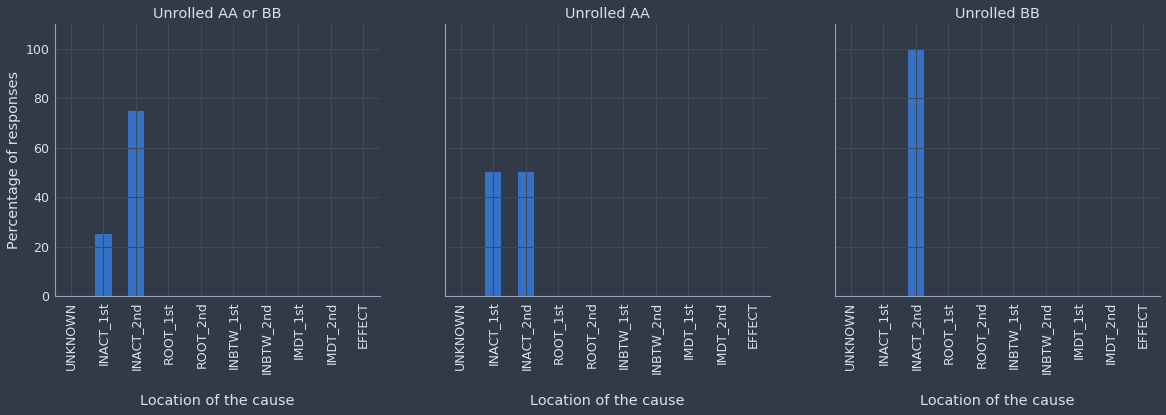

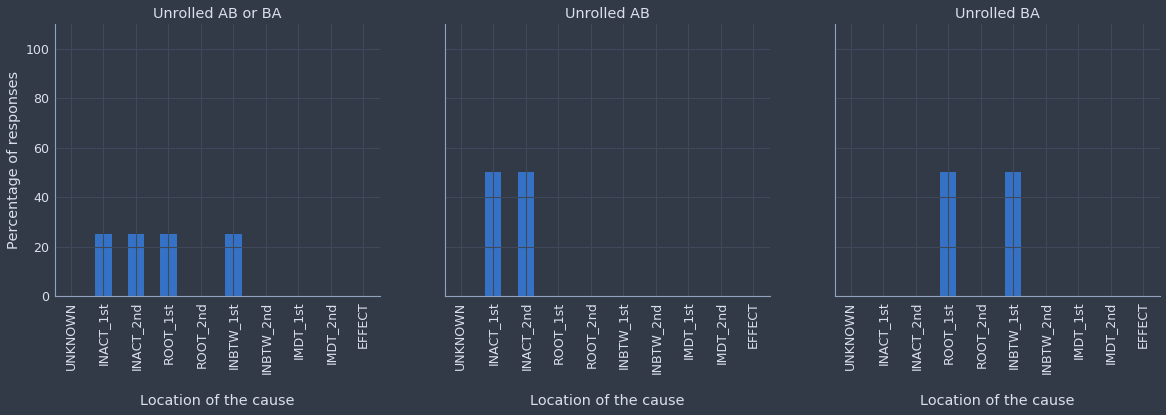

In [15]:
# For Unrolled: only graphs with SQUARES for branch A

chainS = Chain(stim='ChainS')
UnrolledS_state = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True)
UnrolledS_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True,state_branch='A')
UnrolledS_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=True,state_branch='B')
UnrolledS_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares')
UnrolledS_AA = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',root_1st='A')
UnrolledS_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',root_1st='B')
UnrolledS_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False)
UnrolledS_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False,root_1st='A')
UnrolledS_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(A_detectors='squares',state=False,root_1st='B')

graph([chainS],['Chain squares','Chain circles'])
graph([UnrolledS_state,UnrolledS_stateA,UnrolledS_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([UnrolledS_AA_BB,UnrolledS_AA,UnrolledS_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([UnrolledS_AB_BA,UnrolledS_AB,UnrolledS_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])

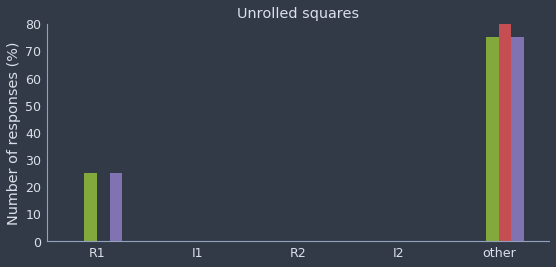

In [16]:
graph2([[UnrolledS_AA_BB,UnrolledS_AB_BA,UnrolledS_state]])
#plt.savefig('results_E2.png',dpi=300,bbox_inches='tight')

## Comparison Right *vs* Left

In [17]:
# Same as the general comparison BUT only for the condition 'right'

chainS = Chain(stim='ChainS').add_filter(sampling='right')
Unrolled_state = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True)
Unrolled_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='A')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True,state_branch='B')
Unrolled_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right',root_1st='A')
Unrolled_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right',root_1st='B')
Unrolled_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False)
Unrolled_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False,root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False,root_1st='B')

graph([chainS],['Chain squares','Chain circles'])
graph([Unrolled_state,Unrolled_stateA,Unrolled_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([Unrolled_AA_BB,Unrolled_AA,Unrolled_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([Unrolled_AB_BA,Unrolled_AB,Unrolled_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Same as the general comparison BUT only for the condition 'left'

chainS = Chain(stim='ChainS').add_filter(sampling='left')
Unrolled_state = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True)
Unrolled_stateA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True,state_branch='A')
Unrolled_stateB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=True,state_branch='B')
Unrolled_AA_BB = AndGate(rolled=False,continuity='root_1st').add_filter(A_detectors='squares',sampling='left')
Unrolled_AA = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left',A_detectors='squares',root_1st='A')
Unrolled_BB = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left',A_detectors='squares',root_1st='B')
Unrolled_AB_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False)
Unrolled_AB = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False,root_1st='A')
Unrolled_BA = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',A_detectors='squares',state=False,root_1st='B')

graph([chainS],['Chain squares','Chain circles'])
graph([Unrolled_state,Unrolled_stateA,Unrolled_stateB],['Unrolled A or B in state condition','Unrolled A in state condition','Unrolled B in state condition'])
graph([Unrolled_AA_BB,Unrolled_AA,Unrolled_BB],['Unrolled AA or BB','Unrolled AA','Unrolled BB'])
graph([Unrolled_AB_BA,Unrolled_AB,Unrolled_BA],['Unrolled AB or BA','Unrolled AB','Unrolled BA'])

In [ ]:
# Broad comparison between right vs left sampling

chainS_Right = Chain(stim='ChainS').add_filter(sampling='right')
chainS_Left = Chain(stim='ChainS').add_filter(sampling='left')
Unrolled_state_Right = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=True)
Unrolled_state_Left = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',state=True)
Unrolled_AA_BB_Right = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='right')
Unrolled_AA_BB_Left = AndGate(rolled=False,continuity='root_1st').add_filter(sampling='left')
Unrolled_AB_BA_Right = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='right',state=False)
Unrolled_AB_BA_Left = AndGate(rolled=False,continuity='root_2nd').add_filter(sampling='left',state=False)

graph([chainS_Left,chainS_Right],['Chain squares left','Chain squares right'])
graph([Unrolled_state_Left,Unrolled_state_Right],['Unrolled A or B in state left','Unrolled A or B in state condition right'])
graph([Unrolled_AA_BB_Left,Unrolled_AA_BB_Right],['Unrolled AA or BB left','Unrolled AA or BB right'])
graph([Unrolled_AB_BA_Left,Unrolled_AB_BA_Right],['Unrolled AB or BA left','Unrolled AB or BA right'])

## Comparison Top *vs* Bottom

In [ ]:
# Broad comparison between TOP vs BOTTOM location of branch A

Unrolled_state_Top = AndGate(rolled=False,continuity='root_2nd').add_filter(level='top',state=True)
Unrolled_state_Bottom = AndGate(rolled=False,continuity='root_2nd').add_filter(level='bottom',state=True)
Unrolled_AA_BB_Top = AndGate(rolled=False,continuity='root_1st').add_filter(level='top')
Unrolled_AA_BB_Bottom = AndGate(rolled=False,continuity='root_1st').add_filter(level='bottom')
Unrolled_AB_BA_Top = AndGate(rolled=False,continuity='root_2nd').add_filter(level='top',state=False)
Unrolled_AB_BA_Bottom = AndGate(rolled=False,continuity='root_2nd').add_filter(level='bottom',state=False)

graph([Unrolled_state_Bottom,Unrolled_state_Top],['Unrolled A or B in state bottom','Unrolled A or B in state condition top'])
graph([Unrolled_AA_BB_Bottom,Unrolled_AA_BB_Top],['Unrolled AA or BB bottom','Unrolled AA or BB top'])
graph([Unrolled_AB_BA_Bottom,Unrolled_AB_BA_Top],['Unrolled AB or BA bottom','Unrolled AB or BA top'])